In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_3340\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
group_by = pd.pivot_table(df, values="count",index=["year",'month','education','gender', 'hc_didnotwork', 'find_new_job','hc_repeat', 'age', 'district', 'region'], aggfunc="sum").reset_index()

In [4]:
# допишите код
def ejection (dat,col):
    q75 = np.percentile(dat[col], 75)
    q25 = np.percentile(dat[col],25)
    iqr = q75-q25
    ejection_h = q75 + iqr*1.5
    ejection_l = q25 - iqr*1.5
    ejection_count = dat[col][(dat[col] > ejection_h) | (dat[col] < ejection_l)].count()
    ejection_perc = ejection_count/dat[col].count() * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc, iqr)


In [5]:
#nice_data = group_by[(group_by['count'] < ejection(group_by,'count')[0]) & (group_by['count'] > ejection(group_by,'count')[1])]
#nice_data = nice_data.reset_index(drop=True)
nice_data = group_by.copy()

#for month in nice_data['month'].unique():
#         i = nice_data[((nice_data['year']==2020) &(nice_data['month']==month) & (nice_data[nice_data['month']==month]['count'] < ejection(nice_data[nice_data['month']==month],'count')[0]) & (nice_data[nice_data['month']==month]['count'] > ejection(nice_data[nice_data['month']==month],'count')[1]))].index
#         nice_data.drop(i,inplace=True)
            
nice_data = group_by[(group_by['count'] < 100)]
nice_data = nice_data.reset_index(drop=True)

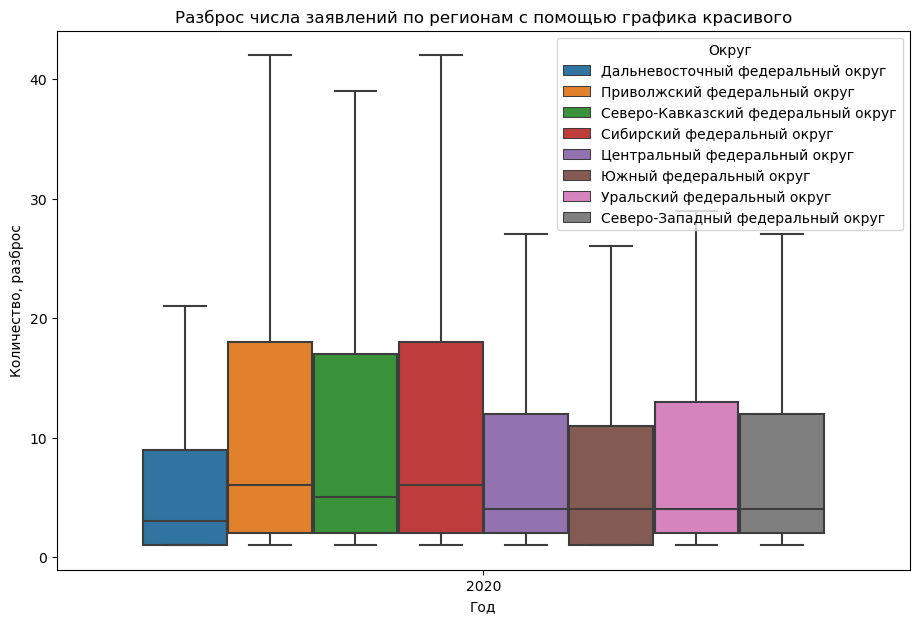

In [10]:
plt.rcParams.update({'font.size': 10})

sns.boxplot(data=group_by[group_by['year']==2020], x='year', y='count', hue='district', showfliers = False).set(title = 'Разброс числа заявлений по регионам с помощью графика красивого', ylabel = 'Количество, разброс', xlabel = 'Год')
plt.legend(title = 'Округ')
plt.savefig('Task10_1.png')

In [11]:
plt.rcParams.update({'font.size': 10})

fig, axes = plt.subplots(4, 2, figsize=(60, 100))

for distr,i in zip(group_by['district'].unique(), axes.flat):
    b = sns.boxplot(ax=i, data=group_by[(group_by['year']==2020) & (group_by['district']==distr)], x='region', y='count', showfliers = False)
    b.axes.set_title(str(distr),fontsize=80)
    b.set_xlabel(str(distr)+', регионы',fontsize=40)
    b.set_ylabel('Количество обращений',fontsize=40)
    b.tick_params(labelsize=5)
    i.tick_params(labelrotation=80,labelsize=40)
fig.tight_layout()

plt.savefig('Task10_2.png')